In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  False
OS:  linux


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [2]:
#Set up Test Variables:

#Test batch size
test_batch_size = 100
c,w,h=3,32,32

In [4]:
#For epoch 160, azure

wds=[0,5e-7,5e-5,5e-3]
#wds=[0]
sch="plateau"

tot=100000
step=10000
n_exp=5
bs=128

def inj_zero_plateau_epoch_160():

    for wd in wds:
        print("Inj iteration: " + str(wd))
        name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
        
        path="./checkpoints/"+ name
        path_best= path + "/"+name+"_epoch_160"

        model = model_actions.load(path_best)

        pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

        res = many_inj.progressive_inj_zero(pfi_model,tot,step,n_exp=n_exp)

        save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
        save_data={}
        save_data["avg"]=res[0]
        save_data["std"]=res[1]
        save_data["loss_avg"] = res[2]
        save_data["loss_std"] = res[3]
        utils.save(save_data,save_name)

In [5]:
az_manage_proc.run_and_delete(log.log_time,inj_zero_plateau_epoch_160)

Found existing instance, use it.
Inj iteration: 0
Injection: 0 of 100000
Injection: 10000 of 100000
Injection: 20000 of 100000
Injection: 30000 of 100000
Injection: 40000 of 100000
Injection: 50000 of 100000
Injection: 60000 of 100000
Injection: 70000 of 100000
Injection: 80000 of 100000
Injection: 90000 of 100000
Injection: 100000 of 100000


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Inj for: 0
Inj for: 5e-07
Inj for: 5e-05
Inj for: 0.005


Text(0, 0.5, 'Accuracy')

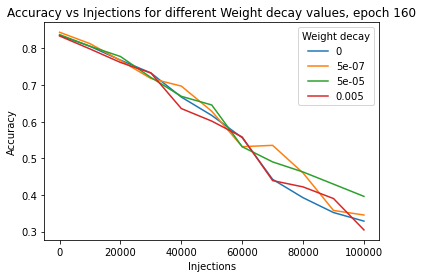

In [6]:
#Graphs for 100k injections, all epoch 160
wds=[0,5e-7,5e-5,5e-3]
sch="plateau"
tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
bs=128

for wd in wds:
    print("Inj for: " + str(wd))
    name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Weight decay values, epoch 160")
plt.legend(wds,title="Weight decay")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

In [7]:
#Same graph but with loss
wds=[0,5e-7,5e-5,5e-3]
sch="plateau"
tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
bs=128

for wd in wds:
    print("Inj for: " + str(wd))
    name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Weight decay values, epoch 160")
plt.legend(wds,title="Weight decay")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

Inj for: 0


ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

In [3]:
#For epoch 80, azure

wds=[0,5e-7,5e-5,5e-3]
#wds=[0]
sch="plateau"

tot=100000
step=10000
n_exp=5
bs=128

def inj_zero_plateau_epoch_80():

    for wd in wds:
        print("Inj iteration: " + str(wd))
        name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
        #Load name
        path="./checkpoints/"+ name
        path_best= path + "/"+name+"_epoch_80"

        model = model_actions.load(path_best)

        pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

        res = many_inj.progressive_inj_zero(pfi_model,tot,step,n_exp=n_exp)
        #Save name
        save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_80"
        save_data={}
        save_data["avg"]=res[0]
        save_data["std"]=res[1]
        save_data["loss_avg"] = res[2]
        save_data["loss_std"] = res[3]
        utils.save(save_data,save_name)

In [4]:
az_manage_proc.run_and_delete(log.log_time,inj_zero_plateau_epoch_80)

Found existing instance, use it.
Logging time
Inj iteration: 0
Injection: 0 of 100000
Injection: 10000 of 100000
Injection: 20000 of 100000
Injection: 30000 of 100000
Injection: 40000 of 100000


Inj for: 0
Inj for: 5e-07
Inj for: 5e-05
Inj for: 0.005


Text(0, 0.5, 'Accuracy')

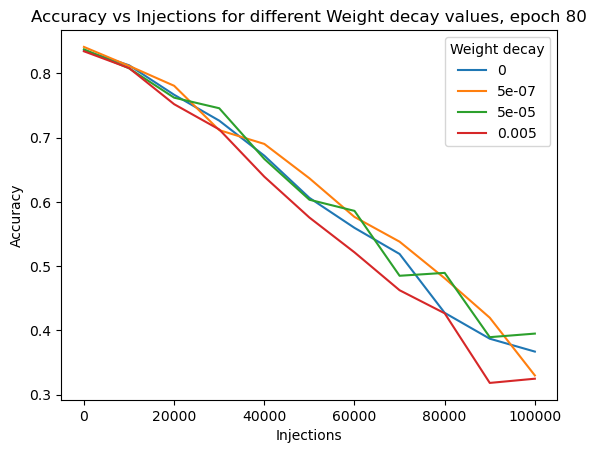

In [2]:
#Graphs for 100k injections, all epoch 80
wds=[0,5e-7,5e-5,5e-3]
sch="plateau"
tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
bs=128

for wd in wds:
    print("Inj for: " + str(wd))
    name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_80"
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Weight decay values, epoch 80")
plt.legend(wds,title="Weight decay")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

In [2]:
#For epoch 160, 10k injections, azure

wds=[0,5e-7,5e-5,5e-3]
#wds=[0]
sch="plateau"

tot=10000
step=1000
n_exp=5
bs=128

def inj_zero_plateau_epoch_160():

    for wd in wds:
        print("Inj iteration: " + str(wd))
        name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
        
        path="./checkpoints/"+ name
        path_best= path + "/"+name+"_epoch_160"

        model = model_actions.load(path_best)

        pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

        res = many_inj.progressive_inj_zero(pfi_model,tot,step,n_exp=n_exp)

        save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
        save_data={}
        save_data["avg"]=res[0]
        save_data["std"]=res[1]
        save_data["loss_avg"] = res[2]
        save_data["loss_std"] = res[3]
        utils.save(save_data,save_name)

In [ ]:
az_manage_proc.run_and_delete(log.log_time,inj_zero_plateau_epoch_160)

Found existing instance, use it.
Logging time
Inj iteration: 0
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
Injection: 6000 of 10000
Injection: 7000 of 10000
Injection: 8000 of 10000
Injection: 9000 of 10000
Injection: 10000 of 10000
Inj iteration: 5e-07
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
Injection: 6000 of 10000
Injection: 7000 of 10000
Injection: 8000 of 10000
Injection: 9000 of 10000
Injection: 10000 of 10000
Inj iteration: 5e-05
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
Injection: 6000 of 10000
Injection: 7000 of 10000
Injection: 8000 of 10000
Injection: 9000 of 10000
Injection: 10000 of 10000
Inj iteration: 0.005
Injection: 0 of 10000
Injection: 1000 of 10000
Injectio

Inj for: 0
Inj for: 5e-07
Inj for: 5e-05
Inj for: 0.005


Text(0, 0.5, 'Accuracy')

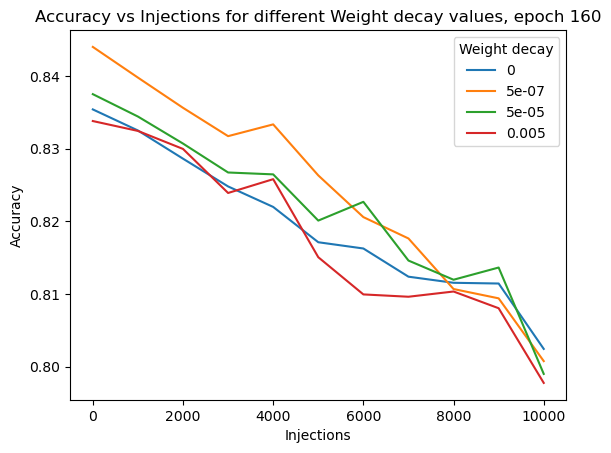

In [2]:
#Graphs for 10k injections, all epoch 160
wds=[0,5e-7,5e-5,5e-3]
sch="plateau"
tot=10000
step=1000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
bs=128

for wd in wds:
    print("Inj for: " + str(wd))
    name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Weight decay values, epoch 160")
plt.legend(wds,title="Weight decay")
plt.xlabel("Injections")
plt.ylabel("Accuracy")